In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Assuming you have already loaded and preprocessed the data as you did earlier
df = pd.read_csv('sp500.csv', parse_dates=True, index_col=0)
df[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']] = df[['Open', 'High', 'Low', 'Close*', 'Volume', 'Adj Close**']].replace({',': ''}, regex=True).astype(float)
df = df.drop(['Close*', 'Adj Close**'], axis='columns')

# Train-test split
data_to_train = df[:1000]
data_to_test = df[1000:]

trainig_set = data_to_train[['Open', 'High', 'Low', 'Volume', 'Adj Close']].values
test_set = data_to_test[['Open', 'High', 'Low', 'Volume', 'Adj Close']].values

# Scaling the data using MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
trainig_set_scaled = sc.fit_transform(trainig_set)

# Create a data structure with 60 timesteps and 1 output
X_train = []  # Independent variables
y_train = []  # Dependent variables
for i in range(60, 1000):
    X_train.append(trainig_set_scaled[i-60:i, :])  # Appending previous 60 days data, including all columns
    y_train.append(trainig_set_scaled[i, 4])  # The 5th column (Adj Close) is the target column

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# Model architecture
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=20)

Epoch 1/100
47/47 [==============================] - 6s 59ms/step - loss: 0.0165
Epoch 2/100
47/47 [==============================] - 3s 72ms/step - loss: 0.0014
Epoch 3/100
47/47 [==============================] - 3s 56ms/step - loss: 0.0011
Epoch 4/100
47/47 [==============================] - 3s 56ms/step - loss: 0.0011
Epoch 5/100
47/47 [==============================] - 3s 56ms/step - loss: 0.0010
Epoch 6/100
47/47 [==============================] - 3s 74ms/step - loss: 9.7340e-04
Epoch 7/100
47/47 [==============================] - 3s 58ms/step - loss: 9.7392e-04
Epoch 8/100
47/47 [==============================] - 3s 57ms/step - loss: 9.0052e-04
Epoch 9/100
47/47 [==============================] - 3s 55ms/step - loss: 8.4047e-04
Epoch 10/100
47/47 [==============================] - 3s 60ms/step - loss: 9.0441e-04
Epoch 11/100
47/47 [==============================] - 4s 75ms/step - loss: 7.9760e-04
Epoch 12/100
47/47 [==============================] - 3s 57ms/step - loss: 6.9847e-

In [ ]:
df = pd.read_csv('sp500.csv', parse_dates=True, index_col=0)
df
df.corr()[['Close*']]

<ipython-input-56-797294f5afea>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[['Close*']]


KeyError: ignored

In [ ]:
# Saving the train and test data to CSV
data_to_train.to_csv('train_data.csv')
data_to_test.to_csv('test_data.csv')



In [ ]:
# Loading the train and test data
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [ ]:
train_data

,Date,Open,High,Low,Volume,Return,Close,Adj Close
0,2023-01-03,3853.29,3878.46,3794.33,3.959140e+09,-15.36,3824.14,3824.14
1,2022-12-30,3829.06,3839.85,3800.34,2.979870e+09,-9.78,3839.50,3839.50
2,2022-12-29,3805.45,3858.19,3805.45,3.003680e+09,66.06,3849.28,3849.28
3,2022-12-28,3829.56,3848.32,3780.78,3.083520e+09,-46.03,3783.22,3783.22
4,2022-12-27,3843.34,3846.65,3813.22,3.030300e+09,-15.57,3829.25,3829.25
...,...,...,...,...,...,...,...,...
995,2019-01-22,2657.88,2657.88,2617.27,3.923950e+09,-37.81,2632.90,2632.90
996,2019-01-18,2651.27,2675.47,2647.58,4.009010e+09,34.75,2670.71,2670.71
997,2019-01-17,2609.28,2645.06,2606.36,3.802410e+09,19.86,2635.96,2635.96
998,2019-01-16,2614.75,2625.76,2612.68,3.882180e+09,5.80,2616.10,2616.10


In [ ]:
test_data

,Date,Open,High,Low,Volume,Return,Close,Adj Close
0,2019-01-14,2580.31,2589.32,2570.41,3.689370e+09,-13.65,2582.61,2582.61
1,2019-01-11,2588.11,2596.27,2577.40,3.447460e+09,-0.38,2596.26,2596.26
2,2019-01-10,2573.51,2597.82,2562.02,3.721300e+09,11.68,2596.64,2596.64
3,2019-01-09,2580.00,2595.32,2568.89,4.088740e+09,10.55,2584.96,2584.96
4,2019-01-08,2568.11,2579.82,2547.56,4.120060e+09,24.72,2574.41,2574.41
...,...,...,...,...,...,...,...,...
255,2018-01-08,2742.67,2748.51,2737.60,3.246160e+09,4.56,2747.71,2747.71
256,2018-01-05,2731.33,2743.45,2727.92,3.239280e+09,19.16,2743.15,2743.15
257,2018-01-04,2719.31,2729.29,2719.07,3.697340e+09,10.93,2723.99,2723.99
258,2018-01-03,2697.85,2714.37,2697.77,3.544030e+09,17.25,2713.06,2713.06


In [ ]:

# Extracting the real stock price for plotting
real_stock_price = test_data.iloc[:, 6:7].values

# Preparing the data for prediction
data_total = pd.concat([train_data['Close'], test_data['Close']], axis=0)
inputs = data_total[len(data_total)-len(test_data)-60:].values
inputs = inputs.reshape(-1, 5)  # Reshape to include all 5 features

sc_predict = MinMaxScaler(feature_range=(0, 1))
inputs = sc_predict.fit_transform(inputs)

In [ ]:
# Create X_test with the desired shape (num_samples, 60, num_features)
num_samples = 200
num_features = 5
X_test = np.zeros((num_samples, 60, num_features))

for i in range(60, len(inputs)):
    X_test[i-60] = inputs[i-60:i, :]

In [ ]:
print(X_test.shape)

(200, 60, 5)


In [ ]:
X_test[190]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0.

In [ ]:

# Making predictions using the model
predicted_stock_price = model.predict(X_test)

7/7 [==============================] - 0s 22ms/step


In [ ]:
predicted_stock_price

array([[0.4984757 ],
       [0.86835694],
       [0.79963094],
       [0.66298497],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090622],
       [0.03090622],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.03090623],
       [0.030

In [ ]:
sc.scale_

array([3.97804121e-04, 3.97157938e-04, 3.86371891e-04, 1.15207506e-10,
       3.90753216e-04])

In [ ]:
scale = 1/3.97804121e-04
scale

2513.8000015841967

In [ ]:
predicted_stock_price = predicted_stock_price*scale

In [ ]:
predicted_stock_price

array([[1253.0682  ],
       [2182.8757  ],
       [2010.1123  ],
       [1666.6117  ],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.69206 ],
       [  77.69206 ],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  77.692085],
       [  

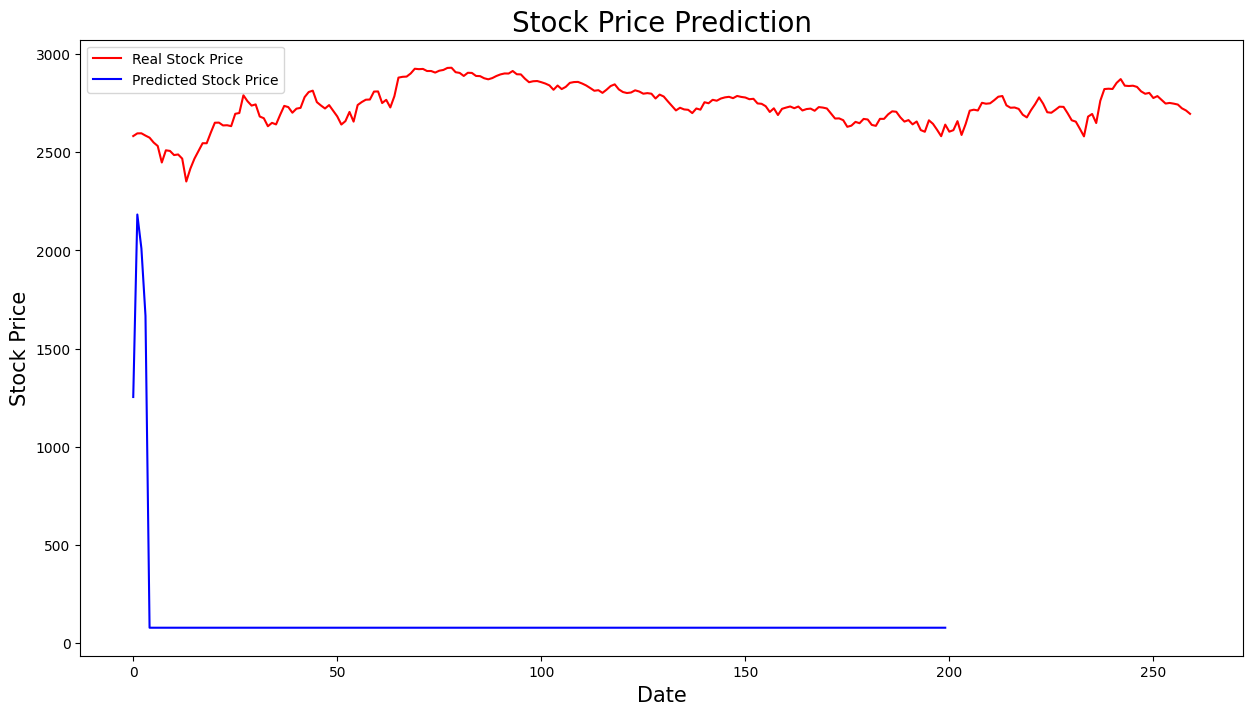

In [ ]:
# Visualizing the results
plt.figure(figsize=(15, 8))
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Stock Price', fontsize=15)
plt.legend()
plt.show()


In [ ]:
test_set.shape

(260, 5)

In [ ]:


X_test = []
for i in range(60, 320):
    X_test.append(inputs[i-60:i, :])  # Use all 5 features for prediction
X_test = np.array(X_test)


# # Visualising the results
# plt.figure(figsize=(15,8))
# plt.plot(real_stock_price, color='Red', label='Real Stock Price')
# plt.plot(predicted_stock_price, color='Blue', label='Predicted Stock Price')
# plt.title('Stock Price Prediction',fontsize=20)
# plt.xlabel('Date', fontsize=15)
# plt.ylabel('Stock Price',fontsize=15)
# plt.legend()
# plt.show()

<ipython-input-505-d835491b9d95>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test = np.array(X_test)


In [ ]:
# X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

# Check the shape of X_test
print(X_test.shape)  # Make sure it is (num_samples, 60, num_features)


(260,)


In [ ]:
predicted_stock_price = model.predict(X_test)

NameError: ignored

In [ ]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
# # Visualising the results
# plt.figure(figsize=(15,8))
# plt.plot(real_stock_price, color='Red', label='Real Stock Price')
# plt.plot(predicted_stock_price, color='Blue', label='Predicted Stock Price')
# plt.title('Stock Price Prediction',fontsize=20)
# plt.xlabel('Date', fontsize=15)
# plt.ylabel('Stock Price',fontsize=15)
# plt.legend()
# plt.show()

In [ ]:

import sys
print(sys.version)


3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


In [ ]:

import numpy as np
np.random.seed(1)

import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import datetime as dt
import time
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('sp500.csv',parse_dates = True,index_col=0)
df[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']] = df[['Open', 'High', 'Low', 'Close*', 'Volume', 'Adj Close**']].replace({',': ''}, regex=True).astype(float)
df = df.drop(['Close*', 'Adj Close**'], axis='columns')
df.tail()

,Open,High,Low,Volume,Return,Close,Adj Close
Date,,,,,,,
2018-01-08,2742.67,2748.51,2737.60,3.246160e+09,4.56,2747.71,2747.71
2018-01-05,2731.33,2743.45,2727.92,3.239280e+09,19.16,2743.15,2743.15
2018-01-04,2719.31,2729.29,2719.07,3.697340e+09,10.93,2723.99,2723.99
2018-01-03,2697.85,2714.37,2697.77,3.544030e+09,17.25,2713.06,2713.06
2018-01-02,2683.73,2695.89,2682.36,3.397430e+09,22.20,2695.81,2695.81


In [ ]:
data_to_train = df[:1000]
data_to_test = df[1000:]

In [ ]:
df= df.iloc[: , 5:6]
df.head()

,Close
Date,
2023-01-03,3824.14
2022-12-30,3839.50
2022-12-29,3849.28
2022-12-28,3783.22
2022-12-27,3829.25


In [ ]:
trainig_set= df.iloc[:1200,:].values

In [ ]:
test_set= df.iloc[1200:,:].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
trainig_set_scaled= sc.fit_transform(trainig_set)

In [ ]:
# Create a data structure with 60 timesteps and 1 output
X_train=[] #Independent variables
y_train= [] # Dependent variables
# I am going to append past 60 days data
for i in range(60,1000):
    X_train.append(trainig_set_scaled[i-60:i,0]) # Appending prevois 60 days data not including 60
    y_train.append(trainig_set_scaled[i,0])

X_train, y_train= np.array(X_train), np.array(y_train)

In [ ]:
# lETS CHECK THE SHAPE OF X_train and y_train
X_train.shape, y_train.shape

((1140, 60), (1140,))

In [ ]:
X_train= np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1140, 60, 1)

In [ ]:
# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM



model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#  Initialising the RNN
# model= Sequential()

# # Adding first LSTM layer and some dropout Dropout regularisation
# model.add(LSTM(units=100,return_sequences=True, input_shape=(X_train.shape[1],1)))
# model.add(Dropout(rate=0.2))

# # Adding second LSTM layer and some dropout Dropout regularisation
# model.add(LSTM(units=100,return_sequences=True))
# model.add(Dropout(rate=0.2))

# # Adding third LSTM layer and some dropout Dropout regularisation
# model.add(LSTM(units=100,return_sequences=True))
# model.add(Dropout(rate=0.2))

# # Adding fourth LSTM layer and some dropout Dropout regularisation
# model.add(LSTM(units=100,return_sequences=True))
# model.add(Dropout(rate=0.2))

# # Adding fifth LSTM layer and some dropout Dropout regularisation
# model.add(LSTM(units=100))
# model.add(Dropout(rate=0.2))

# # Adding the Output Layer
# model.add(Dense(units=1))

# Compiling the Model
# Because we're doing regression hence mean_squared_error
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_46 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_47 (LSTM)              (None, 50)                30200     
                                                                 
 dense_14 (Dense)            (None, 25)                1275      
                                                                 
 dense_15 (Dense)            (None, 1)                 26        
                                                                 
Total params: 72,301
Trainable params: 72,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# df = pd.read_csv('sp500.csv',parse_dates = True,index_col=0)
# df[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']] = df[['Open', 'High', 'Low', 'Close*', 'Volume', 'Adj Close**']].replace({',': ''}, regex=True).astype(float)
# df = df.drop(['Close*', 'Adj Close**'], axis='columns')
# df.tail()

# data_to_train = df[:1000]
# data_to_test = df[1000:]

# df= df.iloc[: , 5:6]
# df.head()

# trainig_set= df.iloc[:1200,:].values
# test_set= df.iloc[1200:,:].values

# from sklearn.preprocessing import MinMaxScaler
# sc= MinMaxScaler(feature_range=(0,1))
# trainig_set_scaled= sc.fit_transform(trainig_set)

# # Create a data structure with 60 timesteps and 1 output
# X_train=[] #Independent variables
# y_train= [] # Dependent variables
# # I am going to append past 60 days data
# for i in range(60,1200):
#     X_train.append(trainig_set_scaled[i-60:i,0]) # Appending prevois 60 days data not including 60
#     y_train.append(trainig_set_scaled[i,0])

# X_train, y_train= np.array(X_train), np.array(y_train)

# X_train= np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
# X_train.shape

# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, LSTM



# model = Sequential()
# model.add(LSTM(100, return_sequences=True, input_shape= (X_train.shape[1], 1)))
# model.add(LSTM(50, return_sequences=False))
# model.add(Dense(25))
# model.add(Dense(1))

# history=model.fit(X_train,y_train,epochs=100,batch_size=20)

In [ ]:
history=model.fit(X_train,y_train,epochs=100,batch_size=20)

Epoch 1/100
57/57 [==============================] - 9s 98ms/step - loss: 0.0165
Epoch 2/100
57/57 [==============================] - 4s 78ms/step - loss: 0.0014
Epoch 3/100
57/57 [==============================] - 4s 78ms/step - loss: 0.0013
Epoch 4/100
57/57 [==============================] - 5s 96ms/step - loss: 0.0012
Epoch 5/100
57/57 [==============================] - 4s 77ms/step - loss: 0.0011
Epoch 6/100
57/57 [==============================] - 5s 88ms/step - loss: 0.0011
Epoch 7/100
57/57 [==============================] - 5s 87ms/step - loss: 0.0011
Epoch 8/100
57/57 [==============================] - 4s 78ms/step - loss: 0.0010
Epoch 9/100
57/57 [==============================] - 5s 94ms/step - loss: 8.3681e-04
Epoch 10/100
57/57 [==============================] - 4s 77ms/step - loss: 8.6607e-04
Epoch 11/100
57/57 [==============================] - 4s 79ms/step - loss: 8.5083e-04
Epoch 12/100
57/57 [==============================] - 5s 93ms/step - loss: 8.3530e-04
Epoch 13/

In [ ]:
data_to_train.to_csv('train_data.csv')
data_to_test.to_csv('test_data.csv')

In [ ]:
#GEtting ready both train and est data set
train_data= pd.read_csv('train_data.csv')
test_data= pd.read_csv('test_data.csv')

In [ ]:
real_stock_price = test_data.iloc[:, 6:7].values

In [ ]:
test_data

,Date,Open,High,Low,Volume,Return,Close,Adj Close
0,2018-03-28,2611.30,2632.65,2593.06,3.875720e+09,-7.62,2605.00,2605.00
1,2018-03-27,2667.57,2674.78,2596.12,3.761320e+09,-45.93,2612.62,2612.62
2,2018-03-26,2619.35,2661.36,2601.81,3.538080e+09,70.29,2658.55,2658.55
3,2018-03-23,2646.71,2657.67,2585.89,3.829380e+09,-55.43,2588.26,2588.26
4,2018-03-22,2691.36,2695.68,2641.59,3.765460e+09,-68.24,2643.69,2643.69
5,2018-03-21,2714.99,2739.14,2709.79,3.434780e+09,-5.01,2711.93,2711.93
6,2018-03-20,2715.05,2724.22,2710.05,3.272590e+09,4.02,2716.94,2716.94
7,2018-03-19,2741.38,2741.38,2694.59,3.327460e+09,-39.09,2712.92,2712.92
8,2018-03-16,2750.57,2761.85,2749.97,5.429140e+09,4.68,2752.01,2752.01
9,2018-03-15,2754.27,2763.03,2741.47,3.543710e+09,-2.15,2747.33,2747.33


In [ ]:
real_stock_price.shape

(260, 1)

In [ ]:
test_set.shape

(60, 1)

In [ ]:
data_total= pd.concat([train_data['Close'], test_data['Close']],  axis=0)
inputs= data_total[len(data_total)-len(test_data)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 320):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
# 3D format
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = model.predict(X_test)

9/9 [==============================] - 0s 38ms/step


In [ ]:
# data_to_train.to_csv('train_data.csv')
# data_to_test.to_csv('test_data.csv')

# # tting ready both train and est data set
# train_data= pd.read_csv('train_data.csv')
# test_data= pd.read_csv('test_data.csv')

# real_stock_price = test_data.iloc[:, 6:7].values

# data_total= pd.concat([train_data['Close'], test_data['Close']],  axis=0)
# inputs= data_total[len(data_total)-len(test_data)-60:].values
# inputs = inputs.reshape(-1,1)
# inputs = sc.transform(inputs)

# X_test = []
# for i in range(60, 320):
#     X_test.append(inputs[i-60:i, 0])

# X_test = np.array(X_test)
# # 3D format
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# predicted_stock_price = model.predict(X_test)

# predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# # Visualising the results
# plt.figure(figsize=(15,8))
# plt.plot(real_stock_price, color='Red', label='Real Stock Price')
# plt.plot(predicted_stock_price, color='Blue', label='Predicted Stock Price')
# plt.title('Stock Price Prediction',fontsize=20)
# plt.xlabel('Date', fontsize=15)
# plt.ylabel('Stock Price',fontsize=15)
# plt.legend()
# plt.show()

In [ ]:
# Inverse the scaling
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price.shape

(260, 1)

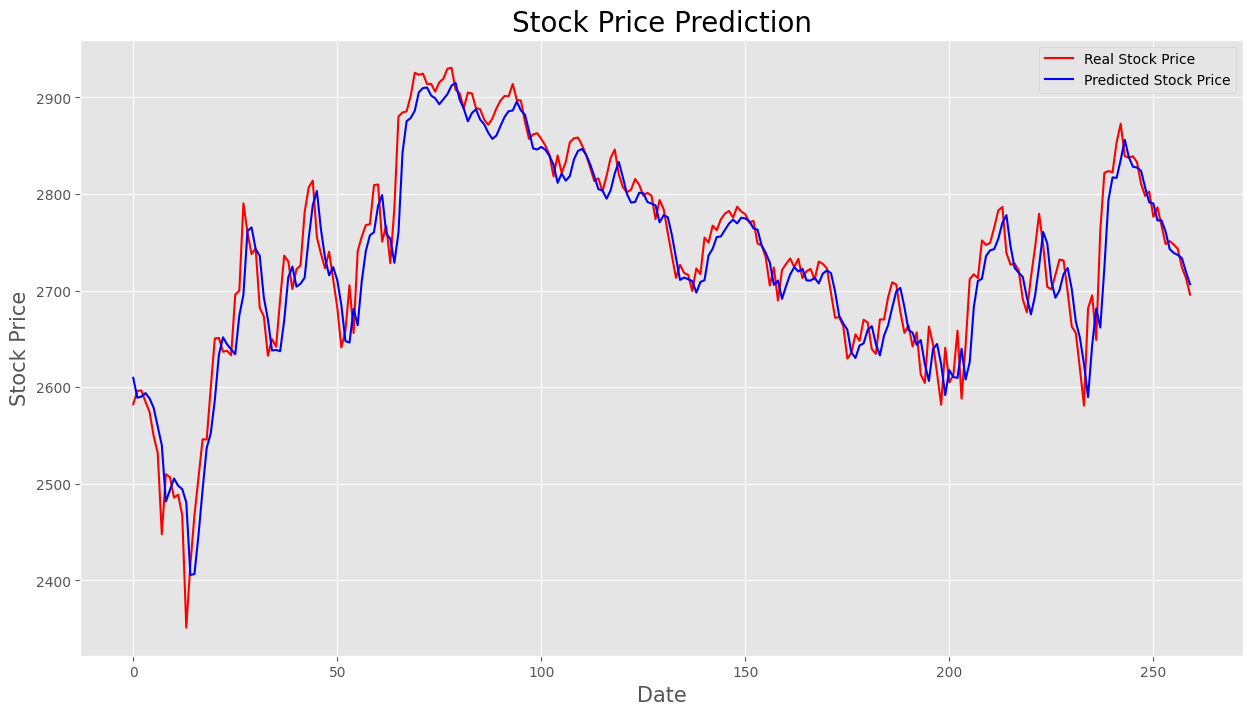

In [ ]:
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(real_stock_price, color='Red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='Blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction',fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Stock Price',fontsize=15)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(real_stock_price, predicted_stock_price)
mae = mean_absolute_error(real_stock_price, predicted_stock_price)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 964.03
Mean Absolute Error (MAE): 22.73


In [ ]:
real_stock_price = real_stock_price.flatten()
predicted_stock_price = predicted_stock_price.flatten()

In [ ]:
quick_test = pd.DataFrame({'Actual': real_stock_price, 'Predicted' : predicted_stock_price})
quick_test.head(20)

,Actual,Predicted
0,2582.61,2609.768066
1,2596.26,2589.149658
2,2596.64,2590.321289
3,2584.96,2593.960205
4,2574.41,2588.449707
5,2549.69,2578.769287
6,2531.94,2559.172607
7,2447.89,2540.008057
8,2510.03,2481.768311
9,2506.85,2493.675537


In [ ]:
quick_test.dropna(inplace=True)
quick_test.to_csv('form1.csv',index=False)
# pd.read_csv('form1.csv').info()


In [ ]:
set = pd.read_csv('form1.csv')

set

,Actual,Predicted
0,2582.61,2609.7680
1,2596.26,2589.1497
2,2596.64,2590.3213
3,2584.96,2593.9602
4,2574.41,2588.4497
...,...,...
255,2747.71,2739.0364
256,2743.15,2736.8906
257,2723.99,2733.5610
258,2713.06,2719.3752


In [ ]:
set['real_stock_price_Return'] = set.Actual.diff()
set['predicted_stock_price_Return'] = set.Predicted.diff()

In [ ]:
real_stock_price_Return = set.Actual.diff()
# real_stock_price_Return.dropna(inplace=True)
real_stock_price_Return.fillna(method='bfill', inplace=True)
real_stock_price_Return

0      13.65
1      13.65
2       0.38
3     -11.68
4     -10.55
       ...  
255    -3.58
256    -4.56
257   -19.16
258   -10.93
259   -17.25
Name: Actual, Length: 260, dtype: float64

In [ ]:
predicted_stock_price_Return = set.Predicted.diff()
predicted_stock_price_Return.fillna(method='bfill', inplace=True)

In [ ]:
real_stock_price_Return = real_stock_price_Return.iloc[1:]
predicted_stock_price_Return = predicted_stock_price_Return.iloc[1:]

In [ ]:
predicted_stock_price_Return

1     -21.1574
2       0.2436
3       3.6279
4      -5.1889
5      -9.7936
        ...   
255    -5.2710
256    -2.7808
257    -3.7597
258   -14.6175
259   -13.6679
Name: Predicted, Length: 259, dtype: float64

In [ ]:
real_stock_price_Return

1      13.65
2       0.38
3     -11.68
4     -10.55
5     -24.72
       ...  
255    -3.58
256    -4.56
257   -19.16
258   -10.93
259   -17.25
Name: Actual, Length: 259, dtype: float64

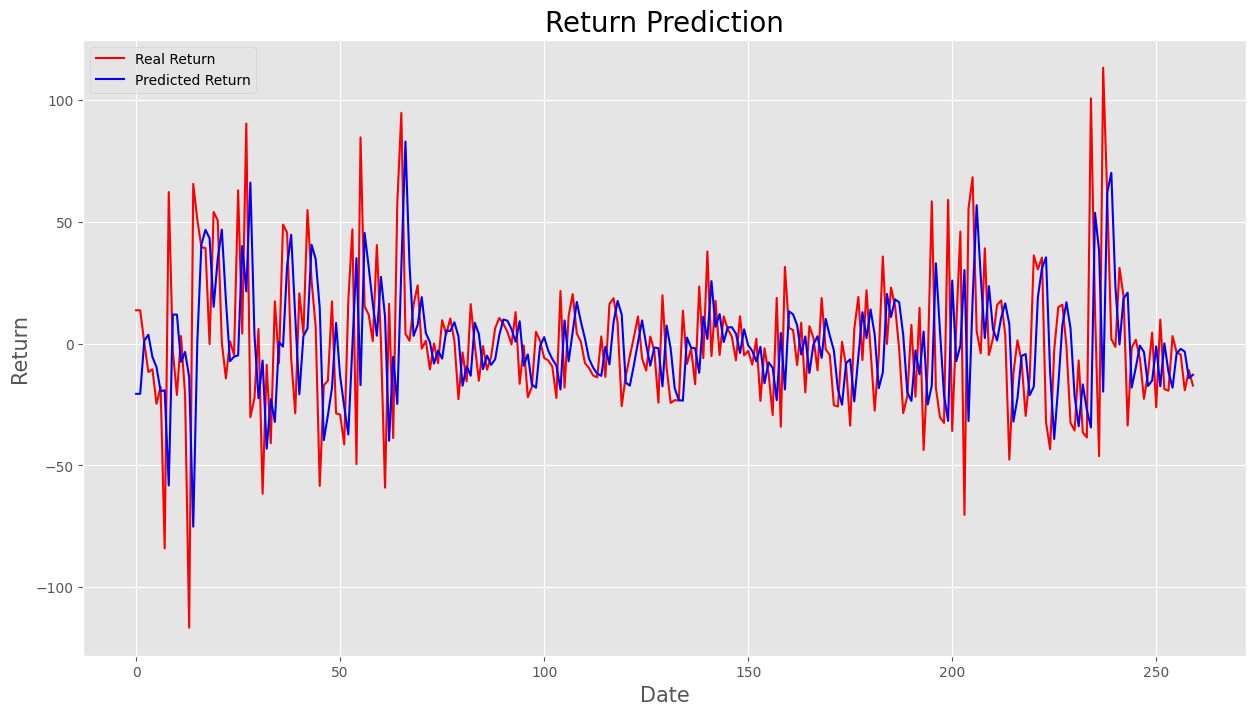

In [ ]:
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(real_stock_price_Return, color='Red', label='Real Return')
plt.plot(predicted_stock_price_Return, color='Blue', label='Predicted Return')
plt.title('Return Prediction',fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Return',fontsize=15)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(real_stock_price_Return, predicted_stock_price_Return)
mae = mean_absolute_error(real_stock_price_Return, predicted_stock_price_Return)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 1306.26
Mean Absolute Error (MAE): 25.87


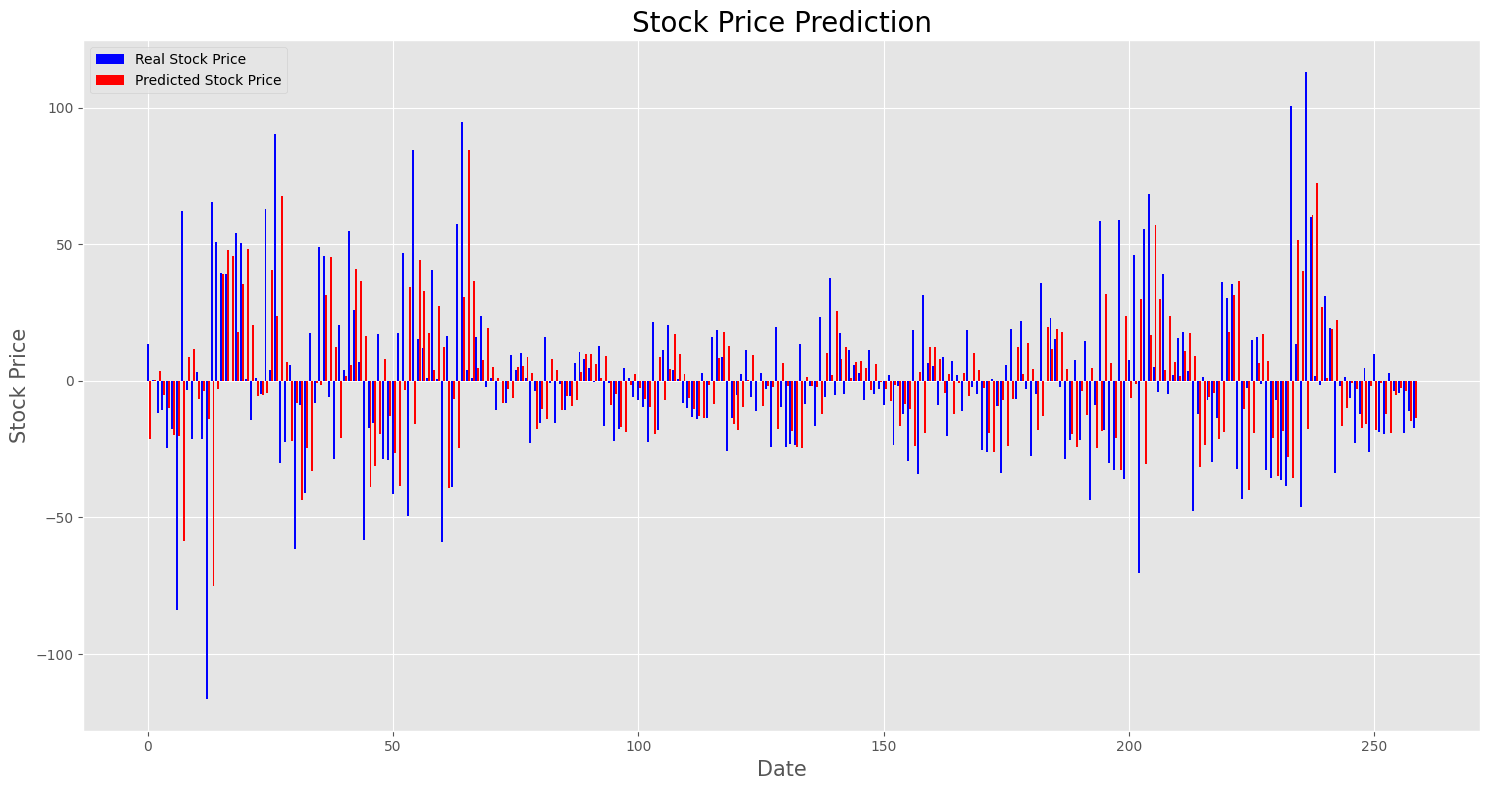

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have 'real_stock_price_Return' and 'predicted_stock_price_Return' as lists or numpy arrays

# Create an array of indices (dates) for the bar chart
dates = range(len(real_stock_price_Return))

# Set the width of each bar
bar_width = 0.4

# Visualizing the results using a bar chart
plt.figure(figsize=(15, 8))

# Plot the real stock prices as blue bars
plt.bar(dates, real_stock_price_Return, width=bar_width, color='blue', label='Real Stock Price')

# Shift the predicted stock prices to the right to separate them from the real prices
plt.bar([index + bar_width for index in dates], predicted_stock_price_Return, width=bar_width, color='red', label='Predicted Stock Price')

# Set the x-axis labels to the dates
# plt.xticks([index + bar_width / 2 for index in dates], your_date_labels_here, rotation=45)

plt.title('Stock Price Prediction', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Stock Price', fontsize=15)
plt.legend()
plt.tight_layout()
plt.show()


***********************


In [ ]:
df = pd.read_csv('fin.csv',parse_dates = True,index_col=0)
df = df.drop(['Price_change'], axis='columns')
df.rename(columns={'Change': 'Return'}, inplace=True)
df

,Return,ma20,S&P500,Close,Positive,Negative,Neutral,Volume
Date,,,,,,,,
2018-01-02,22.20,2788.1035,2695.81,2695.81,0.255685,0.267352,0.476963,3397430000
2018-01-03,17.25,2794.5035,2713.06,2713.06,0.203532,0.295476,0.500992,3544030000
2018-01-04,10.93,2799.9495,2723.99,2723.99,0.201664,0.272806,0.525530,3697340000
2018-01-05,19.16,2801.8565,2743.15,2743.15,0.134174,0.150020,0.715806,3239280000
2018-01-08,4.56,2797.1460,2747.71,2747.71,0.281969,0.176601,0.541430,3246160000
...,...,...,...,...,...,...,...,...
2020-05-08,48.61,2984.3185,2929.80,2929.80,0.314460,0.095021,0.590519,4876030000
2020-05-11,0.39,2999.4480,2930.32,2930.19,0.184708,0.111766,0.703526,4819730000
2020-05-12,-60.07,3013.2975,2870.12,2870.12,0.160295,0.077055,0.762650,5119630000


In [ ]:
data_to_train = df[:500]
data_to_test = df[500:]

In [ ]:
df= df.iloc[: , 0:1]
df.head()

,Return
Date,
2018-01-02,22.20
2018-01-03,17.25
2018-01-04,10.93
2018-01-05,19.16
2018-01-08,4.56


In [ ]:
trainig_set= df.iloc[:500,:].values
test_set= df.iloc[500:,:].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
trainig_set_scaled= sc.fit_transform(trainig_set)

In [ ]:
# Create a data structure with 60 timesteps and 1 output
X_train=[] #Independent variables
y_train= [] # Dependent variables
# I am going to append past 60 days data
for i in range(60,500):
    X_train.append(trainig_set_scaled[i-60:i,0]) # Appending prevois 60 days data not including 60
    y_train.append(trainig_set_scaled[i,0])

X_train, y_train= np.array(X_train), np.array(y_train)

In [ ]:

# lETS CHECK THE SHAPE OF X_train and y_train
X_train.shape, y_train.shape

((440, 60), (440,))

In [ ]:
X_train= np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(440, 60, 1)

In [ ]:
# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

#  Initialising the RNN
model= Sequential()

# Adding first LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100,return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(rate=0.2))

# Adding second LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(rate=0.2))

# Adding third LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(rate=0.2))

# Adding fourth LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(rate=0.2))

# Adding fifth LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100))
model.add(Dropout(rate=0.2))

# Adding the Output Layer
model.add(Dense(units=1))

# Compiling the Model
# Because we're doing regression hence mean_squared_error
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

history=model.fit(X_train,y_train,epochs=100,batch_size=32)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 60, 100)           40800     
                                                                 
 dropout_20 (Dropout)        (None, 60, 100)           0         
                                                                 
 lstm_21 (LSTM)              (None, 60, 100)           80400     
                                                                 
 dropout_21 (Dropout)        (None, 60, 100)           0         
                                                                 
 lstm_22 (LSTM)              (None, 60, 100)           80400     
                                                                 
 dropout_22 (Dropout)        (None, 60, 100)           0         
                                                                 
 lstm_23 (LSTM)              (None, 60, 100)          

In [ ]:
data_to_train.to_csv('train_data.csv')
data_to_test.to_csv('test_data.csv')


In [ ]:
train_data= pd.read_csv('train_data.csv')
test_data= pd.read_csv('test_data.csv')

In [ ]:
test_data

,Date,Return,ma20,S&P500,Close,Positive,Negative,Neutral,Volume
0,2019-12-27,0.11,3273.7765,3240.02,3240.02,0.274682,0.302670,0.422647,2429150000
1,2019-12-30,-18.73,3275.5875,3221.29,3221.29,0.273029,0.284337,0.442633,3021720000
2,2019-12-31,9.49,3278.1930,3230.78,3230.78,0.335628,0.111374,0.552998,2894760000
3,2020-01-02,27.07,3280.8370,3257.85,3257.85,0.419117,0.172851,0.408032,3459930000
4,2020-01-03,-23.00,3279.2205,3234.85,3234.85,0.323531,0.188997,0.487472,3484700000
...,...,...,...,...,...,...,...,...,...
91,2020-05-08,48.61,2984.3185,2929.80,2929.80,0.314460,0.095021,0.590519,4876030000
92,2020-05-11,0.39,2999.4480,2930.32,2930.19,0.184708,0.111766,0.703526,4819730000
93,2020-05-12,-60.07,3013.2975,2870.12,2870.12,0.160295,0.077055,0.762650,5119630000
94,2020-05-13,-50.12,3029.2985,2820.00,2820.00,0.217852,0.200098,0.582050,6151650000


In [ ]:
real_stock_price = test_data.iloc[:, 1:2].values

In [ ]:
real_stock_price.shape


(96, 1)

In [ ]:
test_set.shape

(96, 1)

In [ ]:
data_total= pd.concat([train_data['Return'], test_data['Return']],  axis=0)
inputs= data_total[len(data_total)-len(test_data)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 156):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
# 3D format
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = model.predict(X_test)

3/3 [==============================] - 2s 93ms/step


In [ ]:
# Inverse the scaling
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

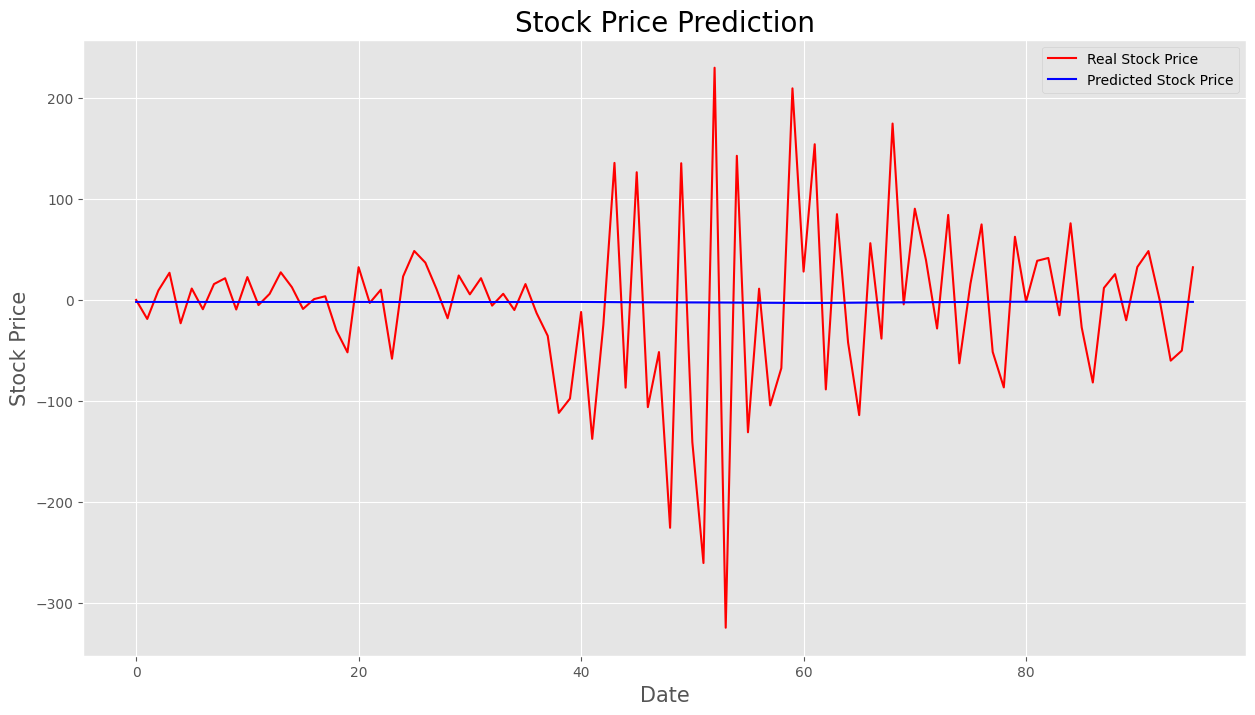

In [ ]:
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(real_stock_price, color='Red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='Blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction',fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Stock Price',fontsize=15)
plt.legend()
plt.show()

sfbsnsb

In [ ]:
df.drop(df[df['Volume']==0].index, inplace = True)

In [ ]:

# Setting up an early stop
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=80,  verbose=1, mode='min')
callbacks_list = [earlystop]


#Build and train the model
def fit_model(train,val,timesteps,hl,lr,batch,epochs):
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []

    # Loop for training data
    for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i])
        Y_train.append(train[i][0])
    X_train,Y_train = np.array(X_train),np.array(Y_train)

    # Loop for val data
    for i in range(timesteps,val.shape[0]):
        X_val.append(val[i-timesteps:i])
        Y_val.append(val[i][0])
    X_val,Y_val = np.array(X_val),np.array(Y_val)

    # Adding Layers to the model
    model = Sequential()
    model.add(LSTM(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                   activation = 'relu'))
    for i in range(len(hl)-1):
        model.add(LSTM(hl[i],activation = 'relu',return_sequences = True))
    model.add(LSTM(hl[-1],activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer = optimizers.Adam(lr = lr), loss = 'mean_squared_error')
    #print(model.summary())

    # Training the data
    history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 0,
                        shuffle = False, callbacks=callbacks_list)
    model.reset_states()
    return model, history.history['loss'], history.history['val_loss']

    def evaluate_model(model,test,timesteps):
      X_test = []
      Y_test = []

    # Loop for testing data
    for i in range(timesteps,test.shape[0]):
        X_test.append(test[i-timesteps:i])
        Y_test.append(test[i][0])
    X_test,Y_test = np.array(X_test),np.array(Y_test)
    #print(X_test.shape,Y_test.shape)

    # Prediction Time !!!!
    Y_hat = model.predict(X_test)
    mse = mean_squared_error(Y_test,Y_hat)
    rmse = sqrt(mse)
    r = r2_score(Y_test,Y_hat)
    return mse, rmse, r, Y_test, Y_hat

    def plot_data(Y_test,Y_hat):
      plt.plot(Y_test,c = 'r')
      plt.plot(Y_hat,c = 'y')
      plt.xlabel('Day')
      plt.ylabel('Price')
      plt.title('Stock Prediction Graph using Multivariate-LSTM model')
      plt.legend(['Actual','Predicted'],loc = 'lower right')
      plt.show()


# Plotting the training errors
def plot_error(train_loss,val_loss):
    plt.plot(train_loss,c = 'r')
    plt.plot(val_loss,c = 'b')
    plt.ylabel('Loss')
    plt.legend(['train','val'],loc = 'upper right')
    plt.show()

series = df[['Close','High','Low']] # Picking the series with high correlation
print(series.shape)
print(series.tail())

(1260, 3)
              Close     High      Low
Date                                 
2018-01-08  2747.71  2748.51  2737.60
2018-01-05  2743.15  2743.45  2727.92
2018-01-04  2723.99  2729.29  2719.07
2018-01-03  2713.06  2714.37  2697.77
2018-01-02  2695.81  2695.89  2682.36


In [ ]:
train_start = dt.date(2018, 1, 2)
train_end = dt.date(2019, 10, 31)

val_start = dt.date(2019, 11, 1)
val_end = dt.date(2019, 11, 21)

test_start = dt.date(2019, 11, 22)
test_end = dt.date(2019, 12, 26)

# Convert date objects to datetime objects
train_start_dt = pd.to_datetime(train_start)
train_end_dt = pd.to_datetime(train_end)

val_start_dt = pd.to_datetime(val_start)
val_end_dt = pd.to_datetime(val_end)

test_start_dt = pd.to_datetime(test_start)
test_end_dt = pd.to_datetime(test_end)

# Split the data using boolean indexing
train_data = series[(series.index >= train_start_dt) & (series.index <= train_end_dt)]
val_data = series[(series.index >= val_start_dt) & (series.index <= val_end_dt)]
test_data = series[(series.index >= test_start_dt) & (series.index <= test_end_dt)]

print(train_data.shape, val_data.shape, test_data.shape)

(462, 3) (15, 3) (23, 3)


In [ ]:
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)
test = sc.transform(test_data)
print(train.shape,val.shape,test.shape)

(462, 3) (15, 3) (23, 3)


In [ ]:
timesteps = 50
hl = [40,35]
lr = 1e-3
batch_size = 64
num_epochs = 250

model,train_error,val_error = fit_model(train,val,timesteps,hl,lr,batch_size,num_epochs)
plot_error(train_error,val_error)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


KeyError: ignored

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.layers import LSTM
from keras import optimizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import datetime as dt
import time
plt.style.use('ggplot')

In [ ]:
data_training = pd.read_csv('new_train.csv')
data_training = data_training.drop(['Date'], axis='columns')

In [ ]:
scaler = MinMaxScaler()
data_training_scaled = scaler.fit_transform(data_training)
print(data_training_scaled.shape)

(500, 12)


In [ ]:
data_training_scaled

array([[0.56451543, 1.        , 1.        , ..., 1.        , 1.        ,
        0.83333333],
       [0.48983855, 0.99523028, 0.9814021 , ..., 1.        , 1.        ,
        0.76666667],
       [0.5047217 , 0.98851272, 0.98211091, ..., 1.        , 1.        ,
        0.73333333],
       ...,
       [0.54014535, 0.37324659, 0.41953848, ..., 0.        , 0.        ,
        0.1       ],
       [0.56764872, 0.36604008, 0.40724114, ..., 0.        , 0.        ,
        0.06666667],
       [0.58919013, 0.35757117, 0.38783317, ..., 0.        , 0.        ,
        0.03333333]])

In [ ]:
X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training_scaled[i-60: i])
    y_train.append(data_training_scaled[i, 0])

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((440, 60, 12), (440,))

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 12)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

In [ ]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 60, 50)            12600     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_4 (LSTM)               (None, 120)              

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs=50, batch_size = 32)

Epoch 1/50
14/14 [==============================] - 67s 304ms/step - loss: 0.0940
Epoch 2/50
14/14 [==============================] - 3s 206ms/step - loss: 0.0273
Epoch 3/50
14/14 [==============================] - 3s 209ms/step - loss: 0.0216
Epoch 4/50
14/14 [==============================] - 3s 209ms/step - loss: 0.0211
Epoch 5/50
14/14 [==============================] - 4s 314ms/step - loss: 0.0212
Epoch 6/50
14/14 [==============================] - 3s 207ms/step - loss: 0.0206
Epoch 7/50
14/14 [==============================] - 3s 208ms/step - loss: 0.0182
Epoch 8/50
14/14 [==============================] - 3s 208ms/step - loss: 0.0189
Epoch 9/50
14/14 [==============================] - 4s 313ms/step - loss: 0.0187
Epoch 10/50
14/14 [==============================] - 3s 207ms/step - loss: 0.0182
Epoch 11/50
14/14 [==============================] - 3s 207ms/step - loss: 0.0192
Epoch 12/50
14/14 [==============================] - 3s 208ms/step - loss: 0.0187
Epoch 13/50
14/14 [=====

In [ ]:
past_60 = data_training.tail(60)
data_testing = pd.read_csv('new_test.csv')
data_testing = data_testing.drop(['Date'], axis='columns')
dt = past_60.append(data_testing, ignore_index = True)
dt

NameError: ignored

In [ ]:
inputs = scaler.fit_transform(dt)
print(inputs.shape)
inputs

(156, 12)


array([[0.57137969, 0.16557567, 0.32      , ..., 0.18181818, 0.        ,
        0.9       ],
       [0.50238623, 0.16391752, 0.3266333 , ..., 0.18181818, 0.        ,
        0.86666667],
       [0.71168981, 0.16540292, 0.36661589, ..., 0.18181818, 0.        ,
        0.83333333],
       ...,
       [0.60219353, 0.94430121, 0.86474864, ..., 1.        , 0.5       ,
        1.        ],
       [0.5513714 , 0.94107467, 0.85648749, ..., 1.        , 0.5       ,
        0.96666667],
       [0.58530084, 0.93883201, 0.87279217, ..., 1.        , 0.5       ,
        0.86666667]])

In [ ]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((96, 60, 12), (96,))

In [ ]:
y_pred = regressor.predict(X_test)

3/3 [==============================] - 1s 69ms/step


In [ ]:
scale = 1/scaler.scale_[0]

In [ ]:
y_pred = y_pred*scale
y_test = y_test*scale

In [ ]:
y_test

array([357.39, 274.77, 264.82, 325.28, 373.5 , 357.66, 304.87, 350.59,
       336.92, 243.17, 297.81, 401.01, 309.8 , 366.63, 363.83, 323.38,
       387.64, 238.29, 273.49, 399.9 , 341.08, 262.19, 409.32, 296.7 ,
       364.73, 415.46, 320.62, 499.92, 286.64, 381.29, 210.8 , 282.83,
       410.07, 236.29, 479.4 , 353.12, 534.82, 257.37, 220.42, 336.18,
       193.8 , 467.95,   0.  , 555.27,  64.15, 184.04, 460.56,  99.08,
       273.32, 218.71, 451.64, 238.03, 460.9 , 300.35, 187.26, 313.07,
       227.21, 213.03, 289.41, 311.97, 340.75, 315.02, 331.11, 319.38,
       346.59, 330.55, 349.27, 306.82, 335.98, 361.99, 373.56, 348.29,
       266.75, 335.15, 322.05, 357.5 , 273.05, 294.82, 328.68, 325.85,
       316.06, 337.7 , 352.41, 331.03, 319.91, 347.67, 315.54, 346.54,
       340.76, 315.79, 336.32, 301.89, 351.96, 334.38, 306.16, 325.  ])

In [ ]:
y_pred

array([[281.74115],
       [280.89377],
       [279.95258],
       [278.99866],
       [278.09958],
       [277.30142],
       [276.62234],
       [276.07376],
       [275.64426],
       [275.3171 ],
       [275.02176],
       [274.7716 ],
       [274.5949 ],
       [274.53305],
       [274.59824],
       [274.79767],
       [275.13867],
       [275.5801 ],
       [276.04376],
       [276.48087],
       [276.85422],
       [277.15344],
       [277.373  ],
       [277.50906],
       [277.56506],
       [277.5398 ],
       [277.44156],
       [277.283  ],
       [277.06107],
       [276.75494],
       [276.3545 ],
       [275.81314],
       [275.16138],
       [274.45612],
       [273.7573 ],
       [273.11664],
       [272.5695 ],
       [272.1377 ],
       [271.79382],
       [271.52182],
       [271.31244],
       [271.16367],
       [271.07736],
       [271.00177],
       [270.9475 ],
       [270.88986],
       [270.83865],
       [270.81927],
       [270.8497 ],
       [270.96155],


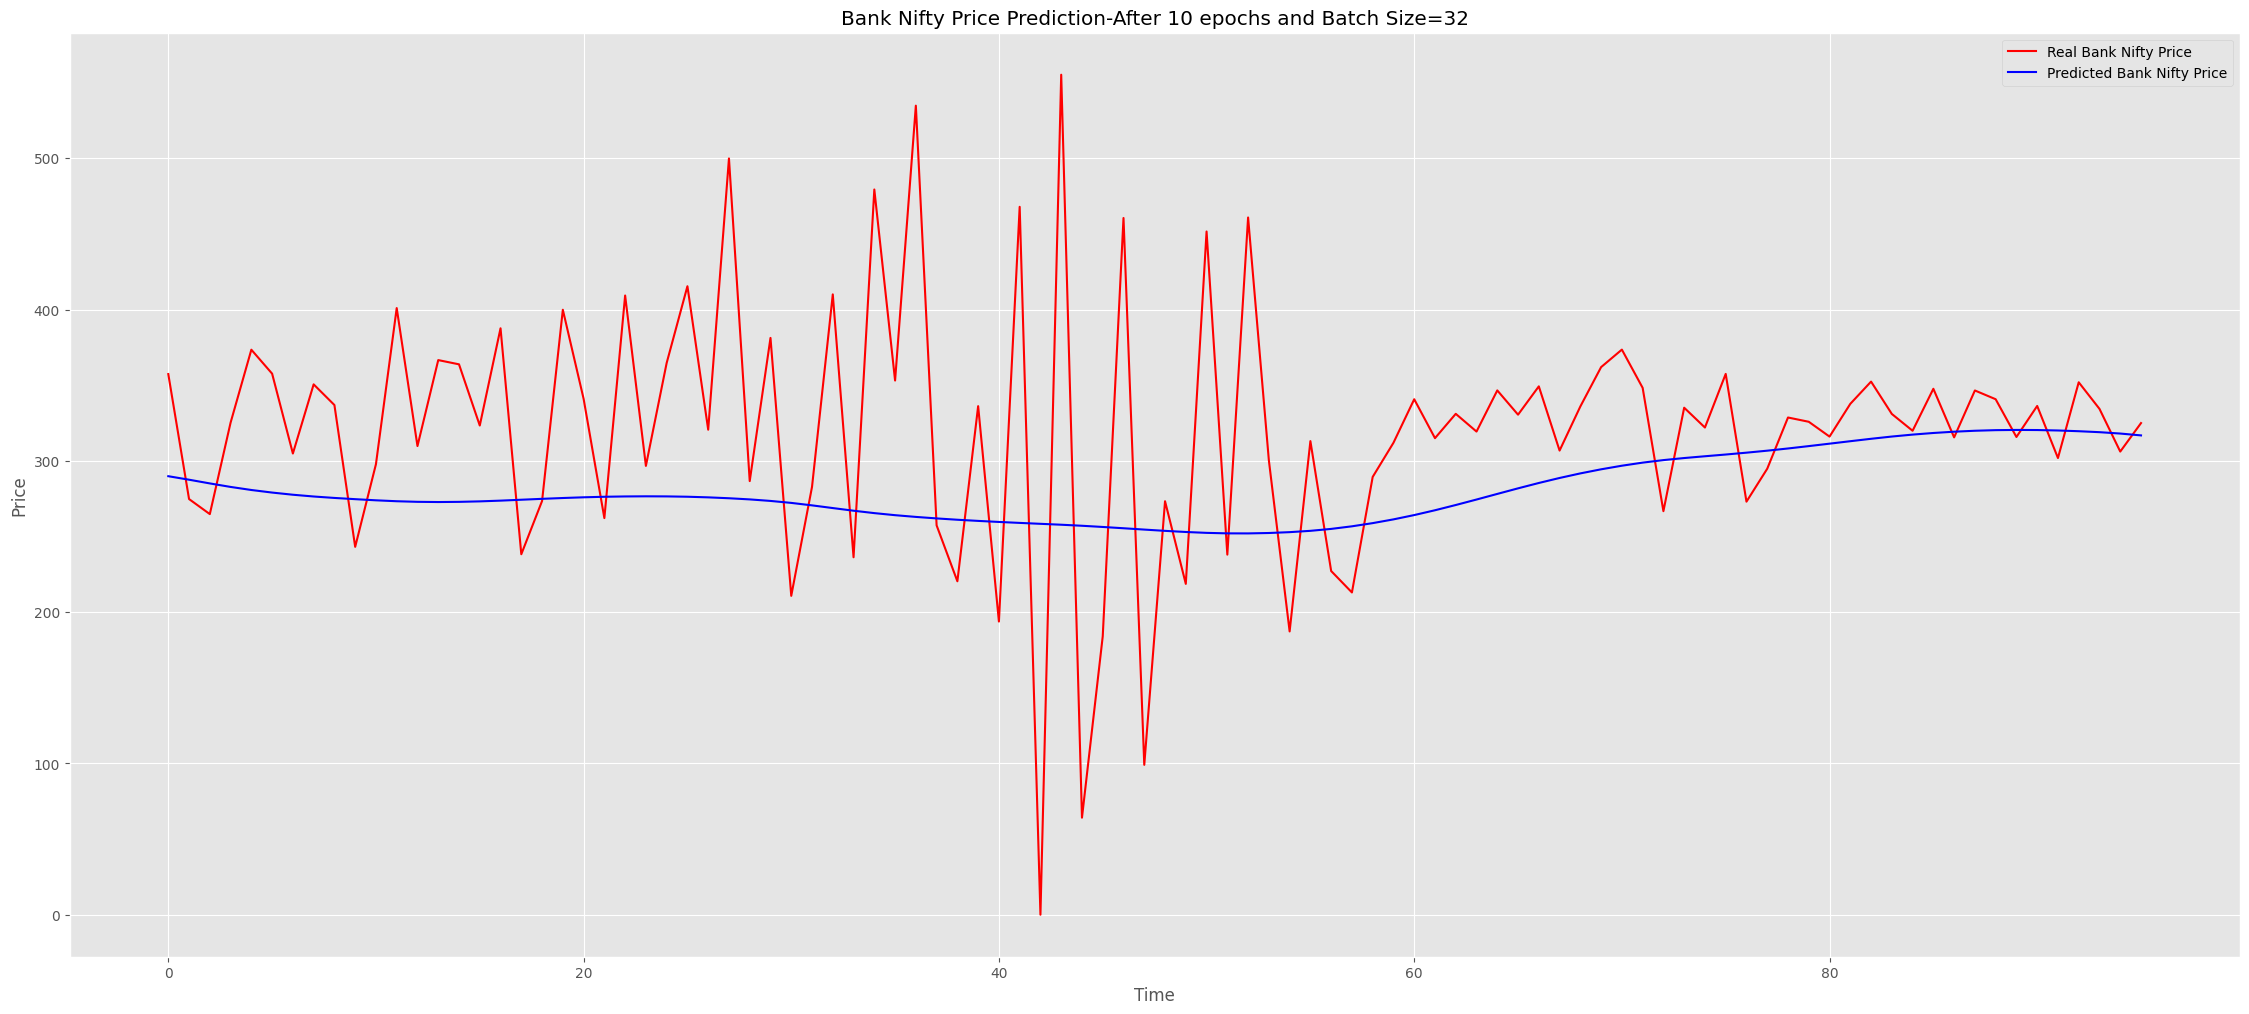

In [ ]:
import matplotlib.pyplot as plt
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Bank Nifty Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bank Nifty Price')
plt.title('Bank Nifty Price Prediction-After 10 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"mean Absolute Error: {mae:.2f}")

Mean Squared Error (MSE): 8761.55
mean Absolute Error: 66.82
